In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")


In [3]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree

import graphviz
import pandas as pd
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees
from sklearn import tree

# Classifier

In [4]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"
tree_classifier = DecisionTreeClassifier(max_depth=6, random_state=random_state)
tree_classifier.fit(dataset[features], dataset[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

## Initialize shadow tree

In [5]:
sk_dtree = ShadowSKDTree(tree_classifier, dataset[features], dataset[target], features, target, [0, 1])

## Visualizations

### viz_leaf_samples

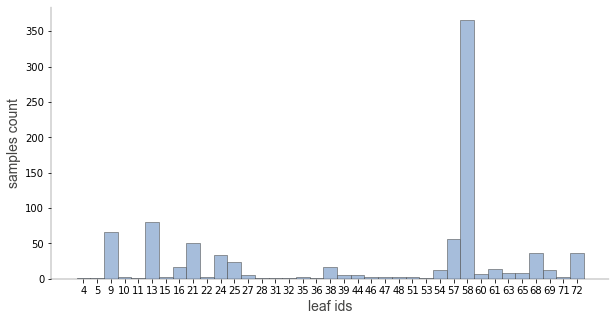

In [7]:
trees.viz_leaf_samples(tree_classifier, dataset[features], features)

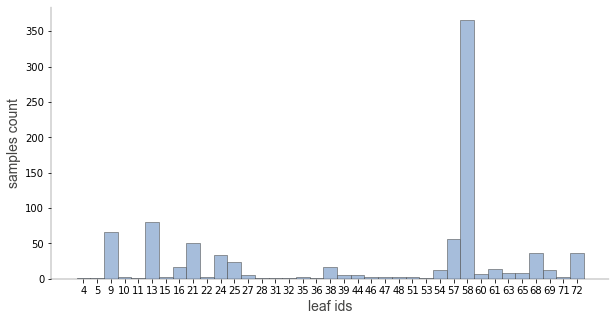

In [8]:
trees.viz_leaf_samples(sk_dtree)

### ctreeviz_leaf_samples

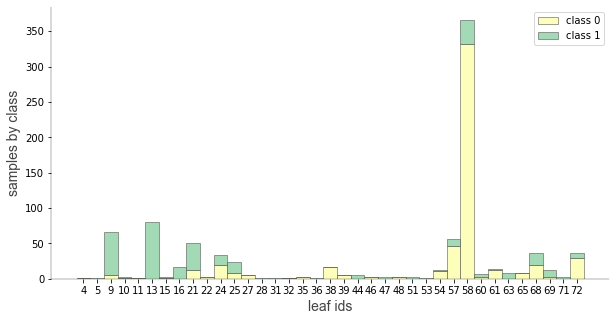

In [10]:
trees.ctreeviz_leaf_samples(tree_classifier, dataset[features], dataset[target], features)

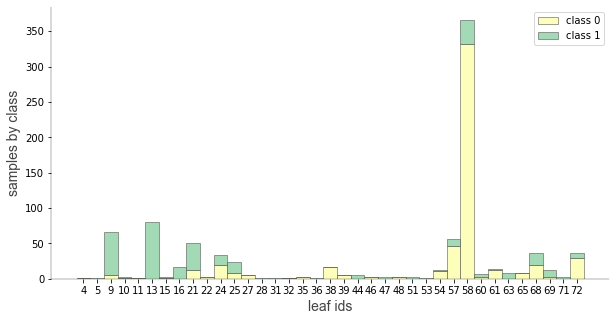

In [11]:
trees.ctreeviz_leaf_samples(sk_dtree)

### dtreeviz

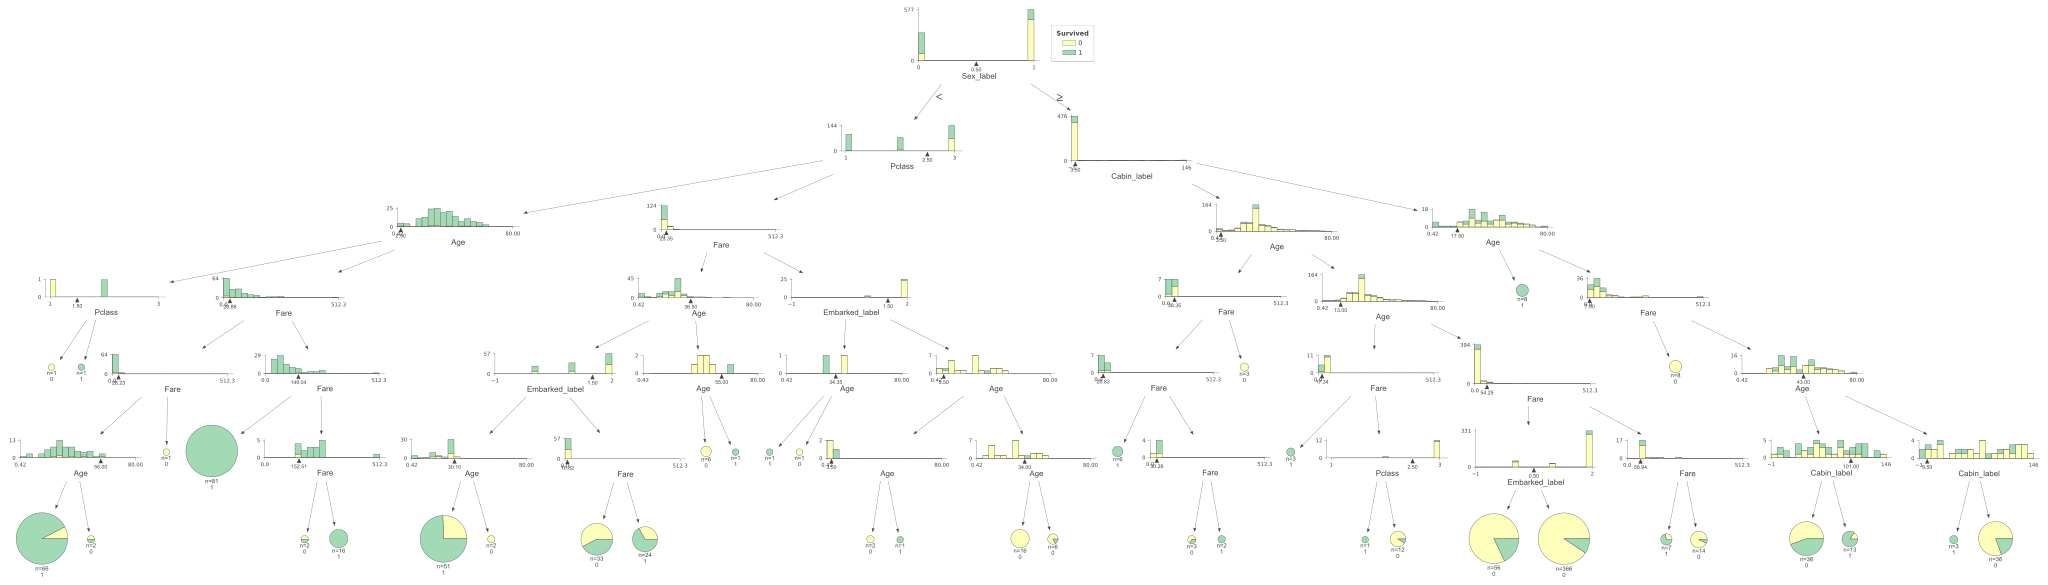

In [13]:
trees.dtreeviz(tree_classifier, dataset[features], dataset[target], features, target, class_names=[0, 1])

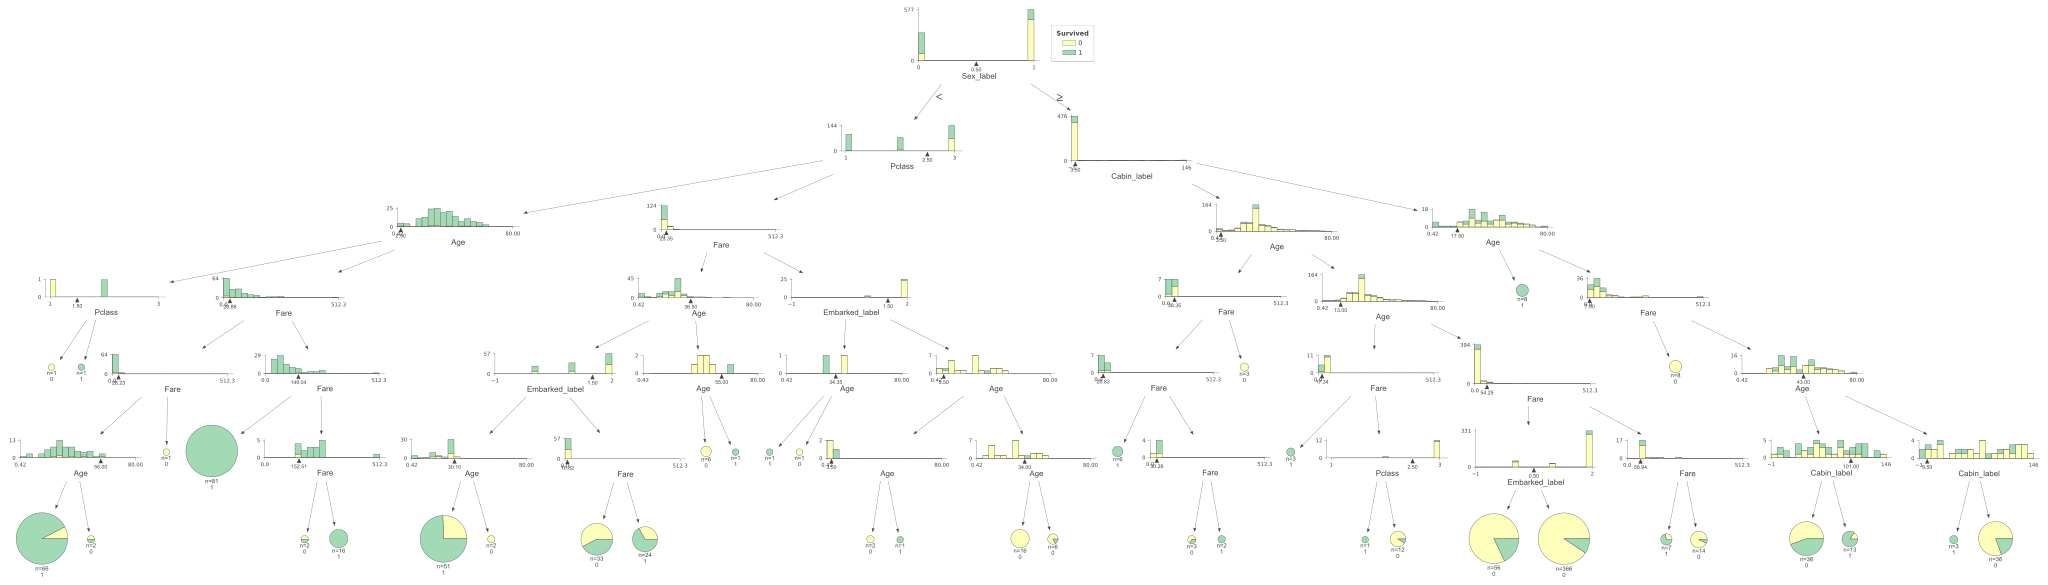

In [14]:
trees.dtreeviz(sk_dtree, fancy=True)

#### balanced trained model

In [15]:
tree_classifier_balanced = DecisionTreeClassifier(max_depth=3, random_state=random_state, class_weight="balanced")
tree_classifier_balanced.fit(dataset[features], dataset[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [33]:
sk_dtree_balanced = ShadowSKDTree(tree_classifier_balanced, dataset[features], dataset[target], features, target, class_names=[0,1])

In [34]:
dataset[target].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [35]:
dataset.query("Sex_label <= 0.5")[target].value_counts()

1    233
0     81
Name: Survived, dtype: int64

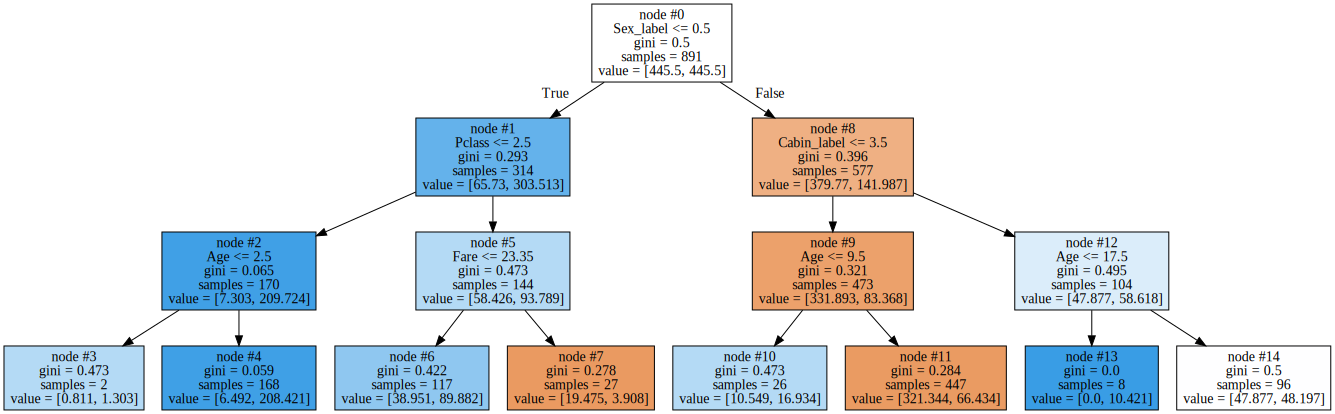

In [36]:
dot_data = tree.export_graphviz(tree_classifier_balanced, out_file=None, feature_names=features,
                                                filled=True, node_ids=True)
graphviz.Source(dot_data)

In [37]:
sk_dtree_balanced.get_class_weights()

array([0.81147541, 1.30263158])

In [38]:
sk_dtree_balanced.get_prediction_value(4) / sk_dtree_balanced.get_class_weights()

array([  8., 160.])

#### show just path

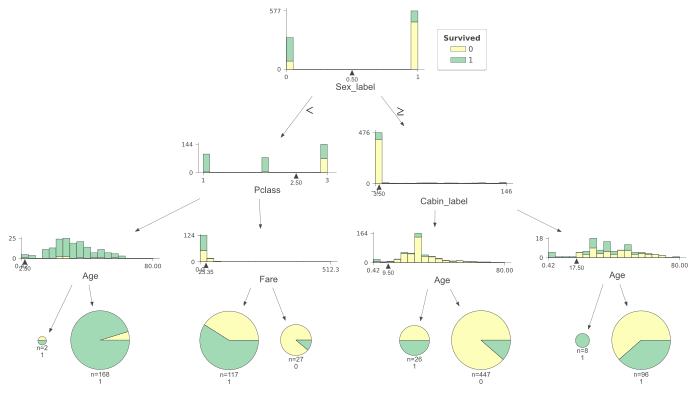

In [39]:
trees.dtreeviz(sk_dtree_balanced)

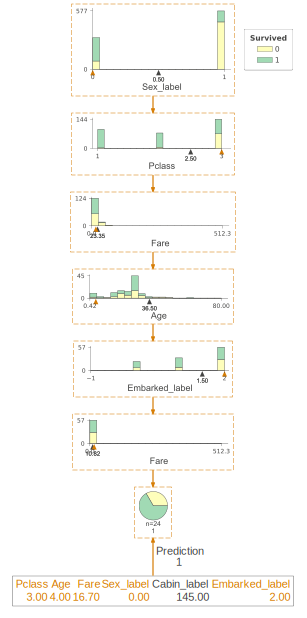

In [40]:
trees.dtreeviz(sk_dtree, show_just_path=True, X = dataset[features].iloc[10])

### viz_leaf_criterion

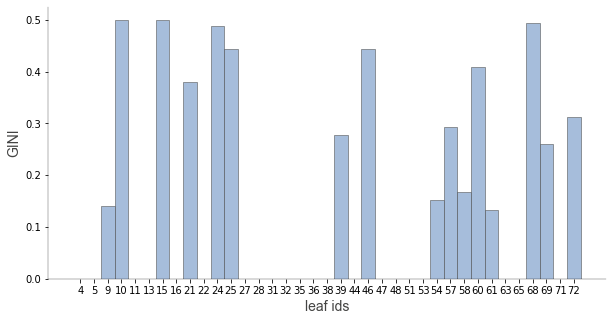

In [17]:
trees.viz_leaf_criterion(tree_classifier)

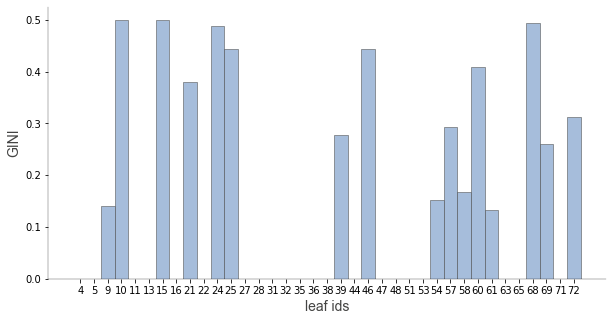

In [18]:
trees.viz_leaf_criterion(sk_dtree)

### describe_node_sample

In [20]:
trees.describe_node_sample(tree_classifier, node_id=1, x_data=dataset[features], feature_names=features)


Pclass         Age        Fare  Sex_label  Cabin_label  \
count  314.000000  314.000000  314.000000      314.0   314.000000   
mean     2.159236   28.216730   44.479818        0.0    23.745223   
std      0.857290   12.877543   57.997698        0.0    43.225526   
min      1.000000    0.750000    6.750000        0.0    -1.000000   
25%      1.000000   21.000000   12.071875        0.0    -1.000000   
50%      2.000000   29.699118   23.000000        0.0    -1.000000   
75%      3.000000   35.000000   55.000000        0.0    35.750000   
max      3.000000   63.000000  512.329200        0.0   145.000000   

       Embarked_label  
count      314.000000  
mean         1.401274  
std          0.863605  
min         -1.000000  
25%          1.000000  
50%          2.000000  
75%          2.000000  
max          2.000000

In [21]:
trees.describe_node_sample(sk_dtree, node_id=10)

Pclass        Age       Fare  Sex_label  Cabin_label  Embarked_label
count  2.000000   2.000000   2.000000        2.0      2.00000             2.0
mean   1.500000  57.500000  18.525000        0.0     92.50000             2.0
std    0.707107   0.707107  11.349064        0.0     61.51829             0.0
min    1.000000  57.000000  10.500000        0.0     49.00000             2.0
25%    1.250000  57.250000  14.512500        0.0     70.75000             2.0
50%    1.500000  57.500000  18.525000        0.0     92.50000             2.0
75%    1.750000  57.750000  22.537500        0.0    114.25000             2.0
max    2.000000  58.000000  26.550000        0.0    136.00000             2.0

### explain_prediction_path

In [23]:
X = dataset[features].iloc[10]
X

Pclass              3.0
Age                 4.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Name: 10, dtype: float64

In [24]:
trees.explain_prediction_path(tree_classifier, X, feature_names=features, explanation_type="plain_english")

2.5 <= Pclass 
Age < 36.5
10.82 <= Fare  < 23.35
Sex_label < 0.5
1.5 <= Embarked_label 


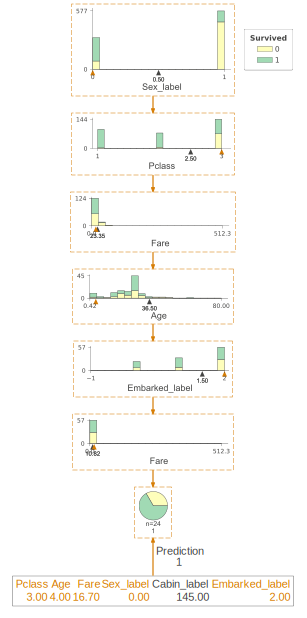

In [25]:
trees.dtreeviz(sk_dtree, show_just_path=True, X=X)

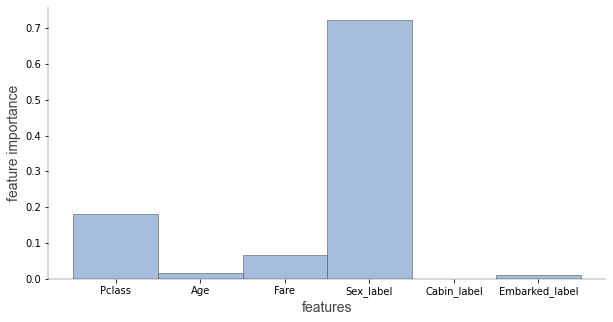

In [26]:
trees.explain_prediction_path(tree_classifier, X, feature_names=features, explanation_type="sklearn_default")

In [31]:
trees.explain_prediction_path(sk_dtree, X, explanation_type="plain_english")

2.5 <= Pclass 
Age < 36.5
10.82 <= Fare  < 23.35
Sex_label < 0.5
1.5 <= Embarked_label 


# Regressor

In [27]:
features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
target_reg = "Age"
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
tree_regressor.fit(dataset[features_reg], dataset[target_reg])


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [28]:
sk_dtree_reg = ShadowSKDTree(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

## Visualizations

### dtreeviz

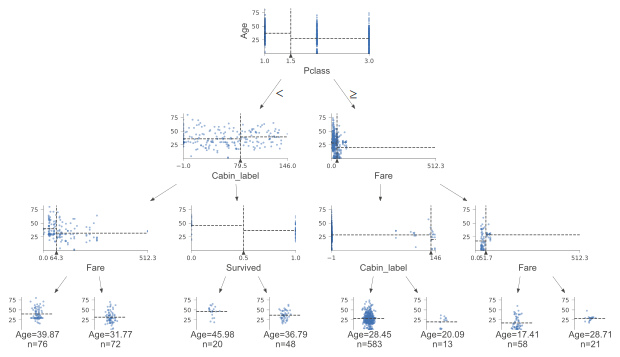

In [29]:
trees.dtreeviz(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

In [ ]:
trees.dtreeviz(sk_dtree_reg)

#### Median vs mean
- it seams that sklearn regressor tree is using median for leaf prediction.

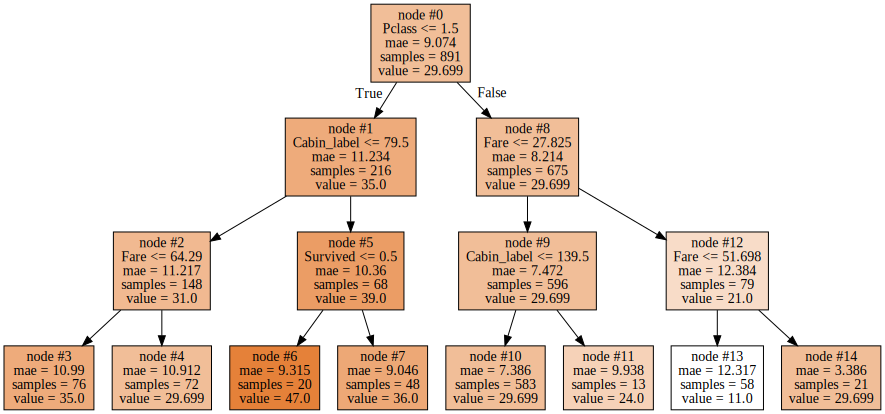

In [58]:
dot_data = tree.export_graphviz(tree_regressor, out_file=None, feature_names=features_reg,
                                                filled=True, node_ids=True)
graphviz.Source(dot_data)

In [59]:
[leaf.id for leaf in sk_dtree_reg.leaves]

[3, 4, 6, 7, 10, 11, 13, 14]

In [60]:
leaf_index = 0 # node number 3
print(dataset[target_reg][sk_dtree_reg.leaves[leaf_index].samples()].median())
print(dataset[target_reg][sk_dtree_reg.leaves[leaf_index].samples()].mean())

35.0
39.86556888544891


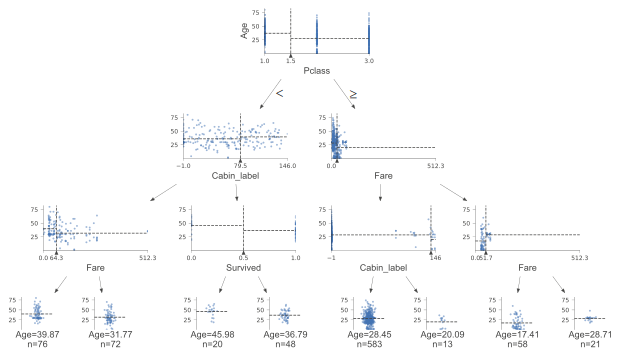

In [61]:
trees.dtreeviz(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

In [62]:
# get data samples from leaf 3
sk_dtree_reg.get_node_samples()[3] 

[3,
 11,
 23,
 30,
 35,
 54,
 55,
 64,
 83,
 96,
 110,
 137,
 155,
 168,
 170,
 174,
 177,
 185,
 187,
 194,
 209,
 263,
 270,
 273,
 284,
 295,
 298,
 329,
 331,
 351,
 383,
 430,
 447,
 449,
 452,
 467,
 475,
 487,
 492,
 493,
 507,
 513,
 523,
 536,
 539,
 545,
 555,
 556,
 571,
 583,
 599,
 602,
 604,
 607,
 630,
 632,
 633,
 647,
 669,
 671,
 690,
 694,
 711,
 712,
 766,
 781,
 793,
 806,
 815,
 822,
 839,
 842,
 867,
 872,
 887,
 889]

In [98]:
x = dataset[features].iloc[3]
x

Pclass             1.0
Age               35.0
Fare              53.1
Sex_label          0.0
Cabin_label       55.0
Embarked_label     2.0
Name: 3, dtype: float64

In [99]:
tree_regressor.predict([x])

array([35.])

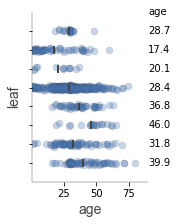

In [100]:
trees.viz_leaf_target(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

#### show just path

In [72]:
x = dataset[features_reg].iloc[10]
x

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

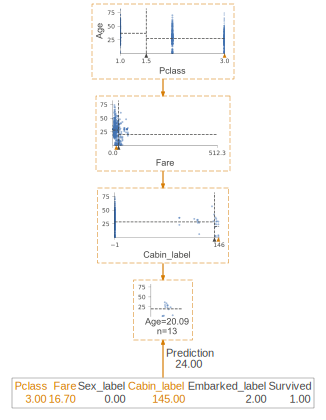

In [73]:
trees.dtreeviz(sk_dtree_reg, show_just_path=True, X = x)

### viz_leaf_samples

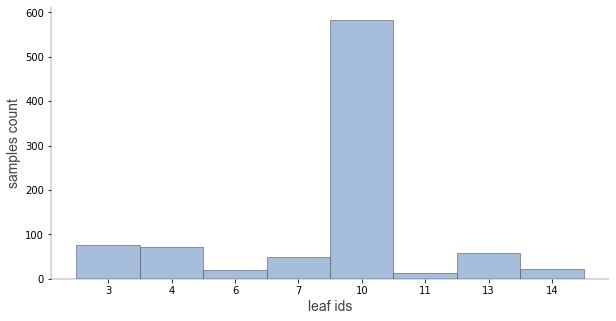

In [74]:
trees.viz_leaf_samples(tree_regressor, dataset[features_reg], features_reg)

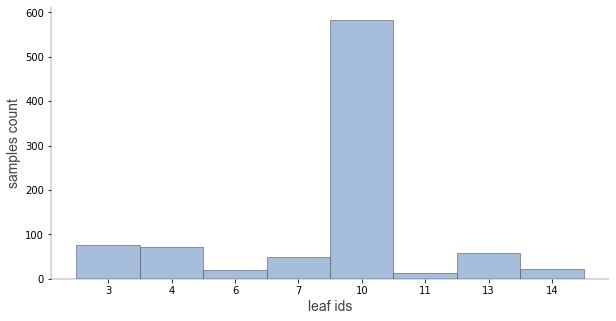

In [75]:
trees.viz_leaf_samples(sk_dtree_reg)

### viz_leaf_criterion

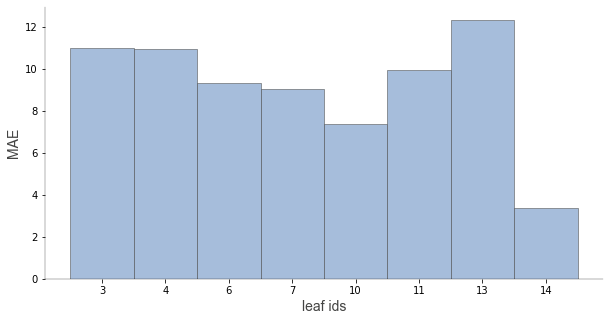

In [76]:
trees.viz_leaf_criterion(tree_regressor)

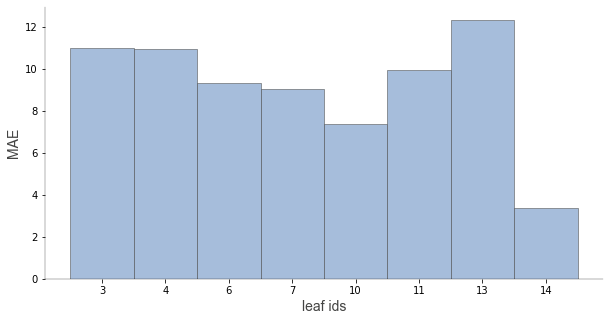

In [77]:
trees.viz_leaf_criterion(sk_dtree_reg)

### viz_leaf_target

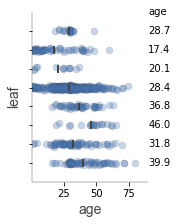

In [78]:
trees.viz_leaf_target(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

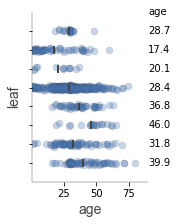

In [79]:
trees.viz_leaf_target(sk_dtree_reg)

### describe_node_sample

In [80]:
trees.describe_node_sample(tree_regressor, node_id=1, x_data=dataset[features], feature_names=features_reg)

Pclass        Fare   Sex_label  Cabin_label  Embarked_label    Survived
count   216.0  216.000000  216.000000   216.000000      216.000000  216.000000
mean      1.0   37.048118   84.154687     0.564815       54.773148    1.175926
std       0.0   14.046369   78.380373     0.496933       43.781906    0.996073
min       1.0    0.920000    0.000000     0.000000       -1.000000   -1.000000
25%       1.0   29.000000   30.923950     0.000000       13.750000    0.000000
50%       1.0   35.000000   60.287500     1.000000       53.500000    2.000000
75%       1.0   47.250000   93.500000     1.000000       91.250000    2.000000
max       1.0   80.000000  512.329200     1.000000      146.000000    2.000000

In [81]:
trees.describe_node_sample(sk_dtree_reg, node_id=1)

Pclass        Fare   Sex_label  Cabin_label  Embarked_label    Survived
count   216.0  216.000000  216.000000   216.000000      216.000000  216.000000
mean      1.0   84.154687    0.564815    54.773148        1.175926    0.629630
std       0.0   78.380373    0.496933    43.781906        0.996073    0.484026
min       1.0    0.000000    0.000000    -1.000000       -1.000000    0.000000
25%       1.0   30.923950    0.000000    13.750000        0.000000    0.000000
50%       1.0   60.287500    1.000000    53.500000        2.000000    1.000000
75%       1.0   93.500000    1.000000    91.250000        2.000000    1.000000
max       1.0  512.329200    1.000000   146.000000        2.000000    1.000000

### explain_prediction_path

In [82]:
X_reg = dataset[features_reg].iloc[10]
X_reg

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

In [83]:
trees.explain_prediction_path(tree_regressor, X_reg, feature_names=features_reg, explanation_type="plain_english")

1.5 <= Pclass 
Fare < 27.82
139.5 <= Cabin_label 


In [84]:
trees.explain_prediction_path(sk_dtree_reg, X_reg, "plain_english")

1.5 <= Pclass 
Fare < 27.82
139.5 <= Cabin_label 


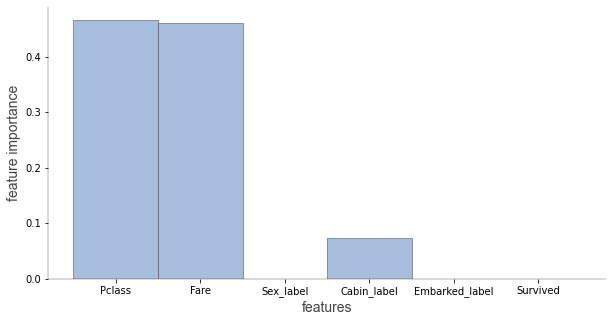

In [85]:
trees.explain_prediction_path(tree_regressor, X_reg, feature_names=features_reg, explanation_type="sklearn_default")

In [86]:
trees.explain_prediction_path(sk_dtree_reg, X_reg, "sklearn_default")

1.5 <= Pclass 
Fare < 27.82
139.5 <= Cabin_label 


### rtreeviz_univar

In [6]:
features_reg_univar = ["Pclass"]
target_reg = "Age"
dtr_univar = DecisionTreeRegressor(max_depth=2, random_state=random_state, criterion="mae")
dtr_univar.fit(dataset[features_reg_univar], dataset[target_reg])


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [7]:
skdtree_univar = ShadowSKDTree(dtr_univar, dataset[features_reg_univar], dataset[target_reg], features_reg_univar, target_reg)

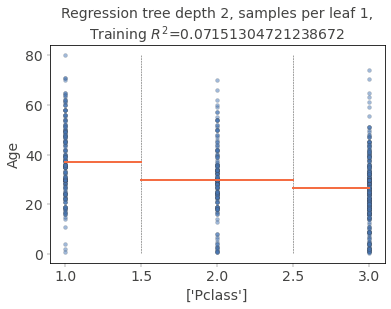

In [8]:
trees.rtreeviz_univar(dtr_univar, dataset[features_reg_univar], dataset[target_reg], features_reg_univar, target_reg)


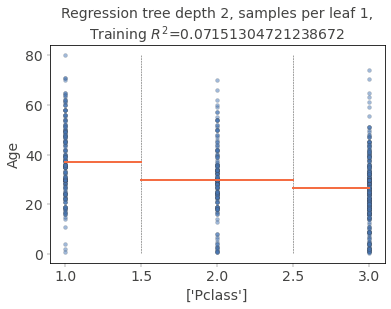

In [9]:
trees.rtreeviz_univar(skdtree_univar)

### rtreeviz_bivar_3D

In [10]:
features_reg_bivar = ["Age", "Fare"]
target_reg = "Pclass"
dtr_bivar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
dtr_bivar.fit(dataset[features_reg_bivar], dataset[target_reg])


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [11]:
skdtree_bivar = ShadowSKDTree(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

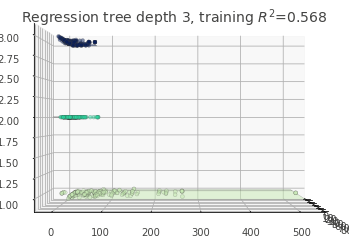

In [12]:
trees.rtreeviz_bivar_3D(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)


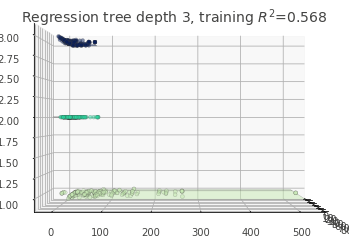

In [13]:
trees.rtreeviz_bivar_3D(skdtree_bivar)

### rtreeviz_bivar_heatmap

In [14]:
features_reg_bivar = ["Pclass", "Fare"]
target_reg = "Age"
dtr_bivar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
dtr_bivar.fit(dataset[features_reg_bivar], dataset[target_reg])


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [15]:
skdtree_bivar = ShadowSKDTree(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

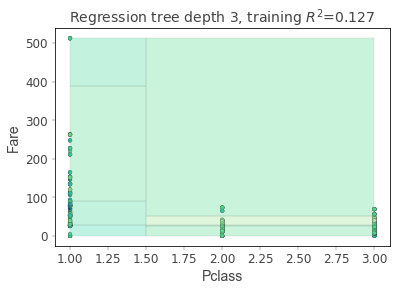

In [16]:
trees.rtreeviz_bivar_heatmap(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

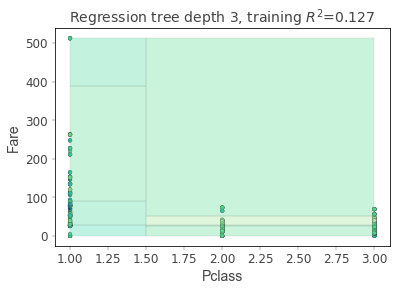

In [17]:
trees.rtreeviz_bivar_heatmap(skdtree_bivar)